In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
import statsmodels.formula.api as smf

#### Access the data from a folder in parent folder '..\'

In [7]:
data = pd.read_csv("..\datasets\WC_AT.csv")
data.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [12]:
data.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


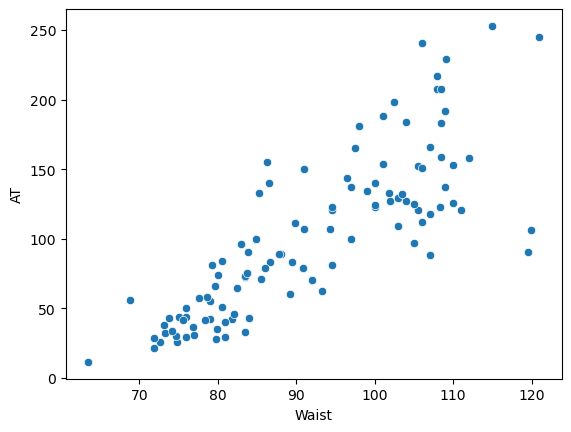

In [14]:
sns.scatterplot(x = data['Waist'], y = data['AT'])
plt.show()

## Corelation

In [15]:
data.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


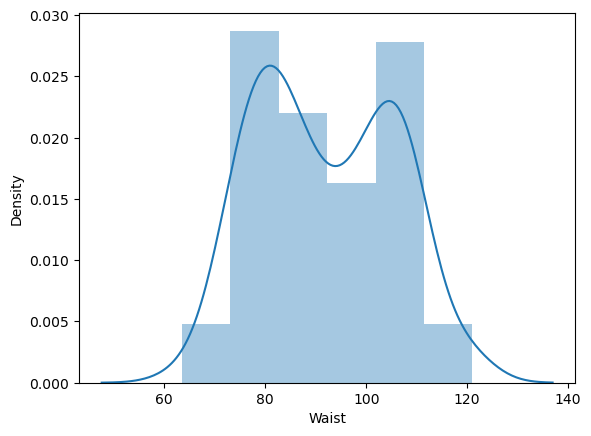

In [17]:
sns.distplot(data['Waist'])
plt.show()

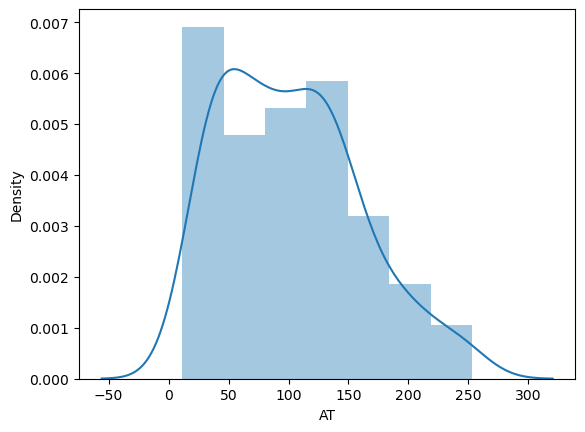

In [18]:
sns.distplot(data['AT'])
plt.show()

In [20]:
model = smf.ols('AT~Waist',data = data).fit()

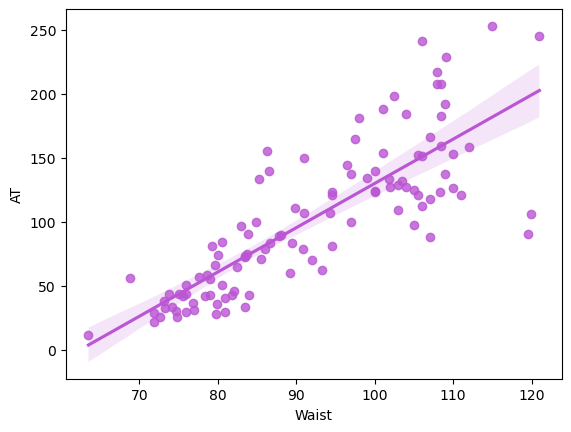

In [23]:
sns.regplot(x='Waist',y='AT',data = data,color = 'mediumorchid')
plt.show()

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Sat, 04 Nov 2023   Prob (F-statistic):           1.62e-27
Time:                        22:26:15   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# Coefficients
print(model.params)

Intercept   -215.981488
Waist          3.458859
dtype: float64


In [30]:
# t and p values
print(model.tvalues)
print('\n\n')
print(model.pvalues)

Intercept    -9.909103
Waist        14.740376
dtype: float64



Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64


In [33]:
# R2 and adjusted R2 of the model 
print(model.rsquared, model.rsquared_adj)

0.670036893052843 0.6669531256981966


## Predict for 97 and 100 Waist curcuferance 

In [34]:
new_data = pd.Series([97,100])

In [36]:
data_pred= pd.DataFrame(new_data,columns=['Waist'])
data_pred

,Waist
0,97
1,100


In [37]:
model.predict(data_pred)

0    119.527873
1    129.904451
dtype: float64

In [39]:
value = pd.array([100,150,24,56],dtype=np.int64)
pred_data1 = pd.DataFrame(value, columns=['Waist'])
pred_data1

,Waist
0,100
1,150
2,24
3,56


In [40]:
model.predict(pred_data1)

0    129.904451
1    302.847421
2   -132.968863
3    -22.285362
dtype: float64

In [41]:
model.mse_resid

1093.289588984286

In [42]:
np.sqrt(model.mse_resid)

33.06492989534812